In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#!pip install pandas 

In [3]:
#!pip install numpy

In [4]:
#!pip install matplotlib

In [5]:
dataset = pd.read_csv('Mall_Customers.csv')


In [6]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:, 3:5].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
#!pip install scikit-learn

C:\Anaconda\envs\aiml\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Anaconda\envs\aiml\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Anaconda\envs\aiml\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\envs\aiml\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Anaconda\envs\aiml\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

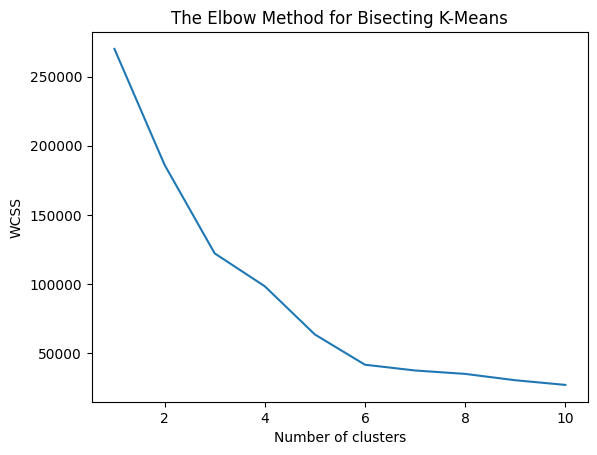

In [10]:
from sklearn.cluster import BisectingKMeans
import numpy as np
import matplotlib.pyplot as plt

#Initialize and fit the Bisecting K-Means model
bisect_means = BisectingKMeans(n_clusters=3, random_state=0).fit(X)

# List to store the sum of squared distances (inertia)
list1 = []
for i in range(1, 11):
    bisect_means = BisectingKMeans(n_clusters=i, random_state=42)
    bisect_means.fit(X)
    list1.append(bisect_means.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method for Bisecting K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html
# Final model with 5 clusters as an example
bisect_means = BisectingKMeans(n_clusters=5, random_state=42).fit(X)
labels = bisect_means.labels_
print("Cluster Labels:", labels)

Cluster Labels: [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 0 2 3 2 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 4 4 0 4 4 4 4 4 4 4 4 4 4]


In [12]:
# Predicting new points
predictions = bisect_means.predict([[0, 0], [12, 3]])
print("Predictions for new points:", predictions)

Predictions for new points: [2 2]


In [13]:
# Cluster centers
cluster_centers = bisect_means.cluster_centers_
print("Cluster Centers:\n", cluster_centers)


Cluster Centers:
 [[79.79411765 83.26470588]
 [55.63013699 50.06849315]
 [27.88461538 23.53846154]
 [26.39130435 76.95652174]
 [91.04545455 26.63636364]]
